## Project
The goal of this project is to exercise the skills that we have learned in class for a region that we are interested in. For this project, we will be using CMIP6 data for our region of interest. 

#### Authors:
- Tom Gibbens-Matsuyama
- Ian Morris-Sibaja



### Load our modules

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Point
import scipy.stats as stats
import numpy as np

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds296-stevenson/share/proj failed


## Introduction
Hawai'i. Write a few paragraphs for LATER

In [2]:
# Region of interest
lat_min, lat_max = 18.791918, 22.593726
lon_min, lon_max = -160.510254, -154.467773

### Metrics to Assess Climate Change
Metrics of interest would be regional averages (time serires plots) and Time averages for map plots. Variables of interest that are most relevant are sea surface temperature (TOS) and Precipitation (PR). 

### Extract Necessary Climate Data
Choosing historical and SSP585 for our models. Models are CanESM5 and 

In [3]:
# Load CMIP6 Catalog
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

In [4]:
# Specify search terms to query catalog 
# activity_id: which project do you want? CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP'] 

# source_id: Two models for this exercise 
source_id = ['MPI-ESM1-2-HR', 'BCC-CSM2-MR']

# experiment_id: what experimental configuration do you want? Here we want historical and the four main SSPs
experiment_ids = ['historical', 'ssp245']

table_id = "Omon"

member_id = ['r2i1p1f1', 'r2i1p1f3']

# variable_id: Sea Surface Temperature 
variable_id = 'tos' 

### View Potential Models

In [5]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, 
                     source_id=source_id,
                     experiment_id=experiment_ids,
                     table_id=table_id,
                     #member_id=member_id,
                     variable_id=variable_id
                    )

res = res.df
res

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,BCC,BCC-CSM2-MR,historical,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/hist...,NaN,20181031
1,CMIP,BCC,BCC-CSM2-MR,historical,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/hist...,NaN,20181102
2,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/hist...,NaN,20181126
3,ScenarioMIP,BCC,BCC-CSM2-MR,ssp245,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-...,NaN,20190319
4,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r5i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
5,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r4i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
6,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r10i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
7,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
8,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
9,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r3i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710


In [6]:
BCC = res[res["source_id"]=='BCC-CSM2-MR'].reset_index(drop=True)
esm1 = res[res["source_id"]=='MPI-ESM1-2-HR'].reset_index(drop=True)

## Metrics Computation

### Narrow Down BCC Model to a Single Member ID

In [7]:
BCC = BCC[BCC['member_id']=='r1i1p1f1']
BCC

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
2,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/BCC/BCC-CSM2-MR/hist...,NaN,20181126
3,ScenarioMIP,BCC,BCC-CSM2-MR,ssp245,r1i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/BCC/BCC-CSM2-...,NaN,20190319


In [8]:
hist_data_BCC = xr.open_zarr(BCC['zstore'][2], storage_options = {'anon':True})
proj_data_BCC = xr.open_zarr(BCC['zstore'][3], storage_options = {'anon':True})

### Narrow down ESM1 Model to a Single Member ID

In [9]:
esm1 = esm1[esm1['member_id']=='r2i1p1f1']
esm1

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
3,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
9,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp245,r2i1p1f1,Omon,tos,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1...,NaN,20190710


In [10]:
# Store as Xarray
hist_data_esm1 = xr.open_zarr(esm1['zstore'][3], storage_options = {'anon':True})
proj_data_esm1 = xr.open_zarr(esm1['zstore'][9], storage_options = {'anon':True})

In [11]:
# Concatenate esm1 data
esm1_245 = xr.concat([hist_data_esm1, proj_data_esm1], dim = "time")
# Concatenate BCC data
BCC_245 = xr.concat([hist_data_BCC, proj_data_BCC], dim = 'time')

# Convert time to datetime64 format
time = esm1_245.time.astype('datetime64[ns]')

time = BCC_245.time.astype('datetime64[ns]')

In [12]:
# Region of interest
lat_min, lat_max = 18.791918, 22.593726
lon_min, lon_max = 360 - 160.510254, 360 - 154.467773

### Define Mask 

In [13]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
esm1_245_tos_mm_lat = (esm1_245.latitude >= lat_min) & (esm1_245.latitude <= lat_max)
esm1_245_tos_mm_lon = (esm1_245.longitude >= lon_min) & (esm1_245.longitude <= lon_max)

BCC_245_tos_mm_lat = (BCC_245.lat >= lat_min) & (BCC_245.lat <= lat_max)
BCC_245_tos_mm_lon = (BCC_245.lon >= lon_min) & (BCC_245.lon <= lon_max)

# Find poits where the mask value True, drop all other points
tos_esm1_mm = esm1_245.where(esm1_245_tos_mm_lat & esm1_245_tos_mm_lon, drop = True)
tos_BCC_mm = BCC_245.where(BCC_245_tos_mm_lat & BCC_245_tos_mm_lon, drop = True)

tos_esm1 = tos_esm1_mm.mean(dim=['i', 'j'])
tos_BCC = tos_BCC_mm.mean(dim=['lat', 'lon'])

### Plot ESM1 Model: Time Series

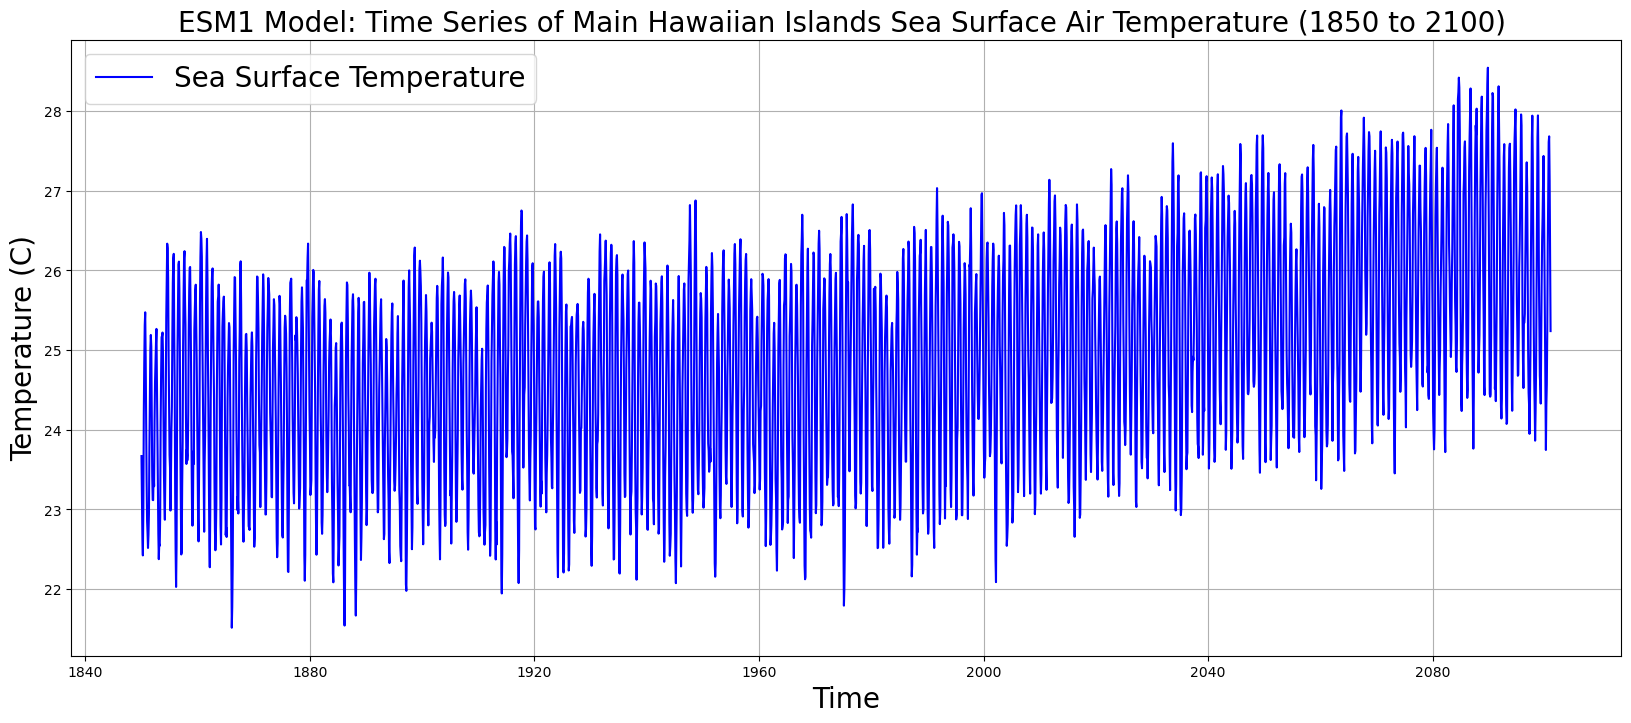

In [14]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tos_esm1.tos, label='Sea Surface Temperature', color='b')
ax.set_title("ESM1 Model: Time Series of Main Hawaiian Islands Sea Surface Air Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (C)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

### Plot BCC Model: Time Series

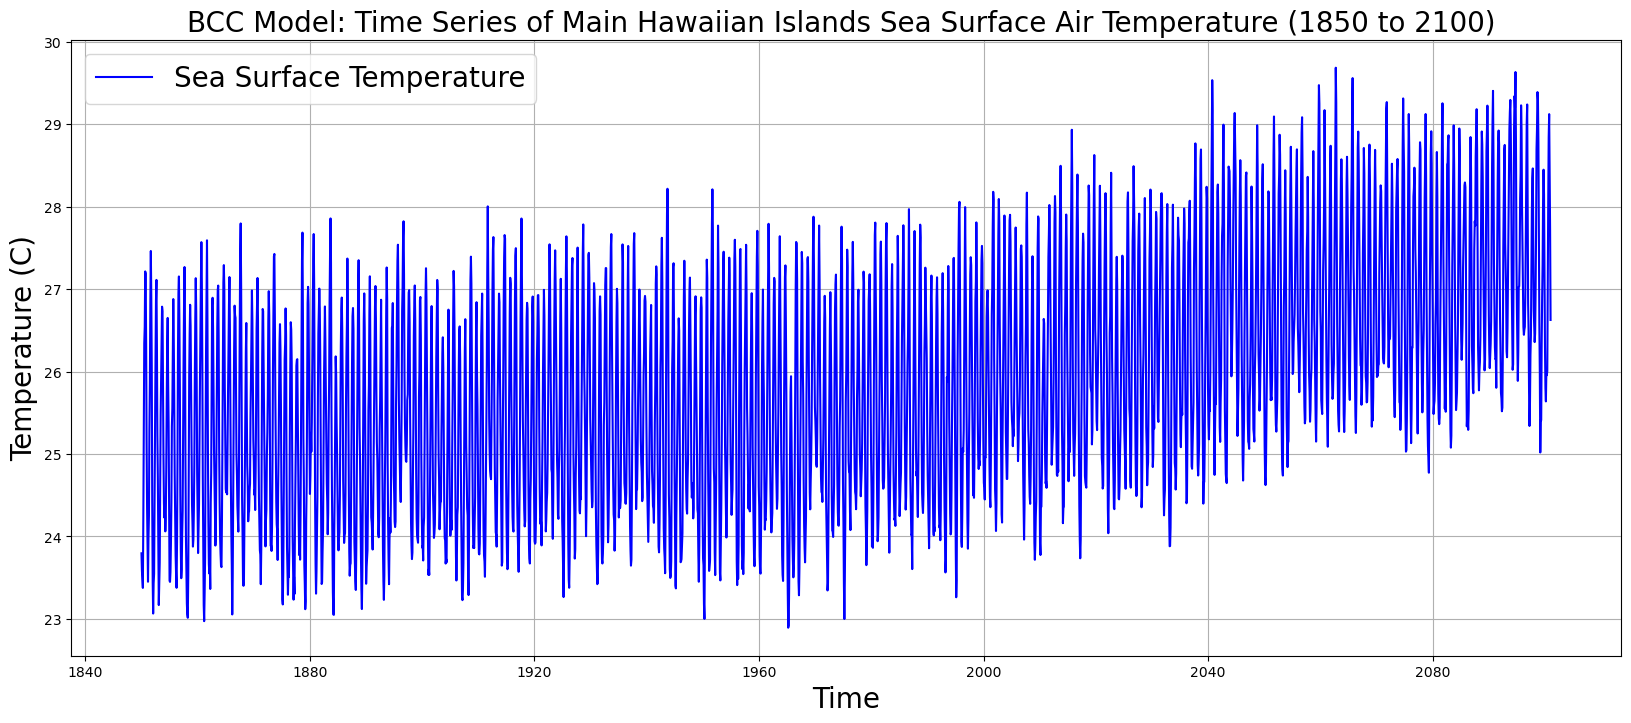

In [15]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tos_BCC.tos, label='Sea Surface Temperature', color='b')
ax.set_title("BCC Model: Time Series of Main Hawaiian Islands Sea Surface Air Temperature (1850 to 2100) ", fontsize=20)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel("Temperature (C)", fontsize=20)
ax.legend(fontsize=20)
ax.grid()
plt.show()

### Mapping Main Hawaiian Islands

In [16]:
# Concatenate esm1 data
esm1_245 = xr.concat([hist_data_esm1, proj_data_esm1], dim = "member")
# Concatenate BCC data
BCC_245 = xr.concat([hist_data_BCC, proj_data_BCC], dim = 'member')

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[k

In [17]:
# Region of interest
# lat_min, lat_max = 18.791918, 22.593726
# lon_min, lon_max = 360 - 160.510254, 360 - 154.467773

In [18]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
esm1_245_tos_mm_lat = (esm1_245.latitude >= lat_min) & (esm1_245.latitude <= lat_max)
esm1_245_tos_mm_lon = (esm1_245.longitude >= lon_min) & (esm1_245.longitude <= lon_max)

BCC_245_tos_mm_lat = (BCC_245.lat >= lat_min) & (BCC_245.lat <= lat_max)
BCC_245_tos_mm_lon = (BCC_245.lon >= lon_min) & (BCC_245.lon <= lon_max)

# Find poits where the mask value True, drop all other points
tos_esm1_mm = esm1_245.where(esm1_245_tos_mm_lat & esm1_245_tos_mm_lon, drop = True)
tos_BCC_mm = BCC_245.where(BCC_245_tos_mm_lat & BCC_245_tos_mm_lon, drop = True)

In [19]:
tos_esm1_mm

<xarray.Dataset>
Dimensions:             (member: 2, time: 3012, j: 10, i: 13, vertices: 4,
                         bnds: 2)
Coordinates:
  * i                   (i) int32 259 260 261 262 263 ... 267 268 269 270 271
  * j                   (j) int32 148 149 150 151 152 153 154 155 156 157
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12...
    latitude            (j, i) float64 22.9 22.87 22.85 ... 18.7 18.68 18.66
    longitude           (j, i) float64 199.9 200.4 200.9 ... 204.2 204.7 205.1
    time_bnds           (member, time, bnds) datetime64[ns] 1850-01-01 ... 21...
Dimensions without coordinates: member, vertices, bnds
Data variables:
    tos                 (member, time, j, i) float32 dask.array<chunksize=(1, 66, 10, 13), meta=np.ndarray>
    vertices_latitude   (member, j, i, vertices) float64 dask.array<chunksize=(1, 10, 13, 4), meta=np.ndarray>
    vertices_longitude  (member, j, i, vertices) float64 dask.array<chunksize=(1, 10, 13, 4), meta=np.ndarray>
Attributes: (12/50)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  18261.0
    cmor_version:           3.5.0
    ...                     ...
    title:                  MPI-ESM1-2-HR output prepared for CMIP6
    tracking_id:            hdl:21.14100/42e40a29-9340-408d-91f3-fbf960d81d2d...
    variable_id:            tos
    variant_label:          r2i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/42e40a29-9340-408d-91f3-fbf960d81d2d...
    version_id:             v20190710

In [20]:
tos_BCC_mm

<xarray.Dataset>
Dimensions:    (member: 2, time: 3012, lat: 4, lon: 7, bnds: 2)
Coordinates:
  * lat        (lat) float64 19.36 20.16 20.99 21.86
  * lon        (lon) float64 199.5 200.5 201.5 202.5 203.5 204.5 205.5
  * time       (time) object 1850-01-16 12:00:00 ... 2100-12-16 12:00:00
    lat_bnds   (lat, bnds) float64 18.97 19.76 19.76 20.58 ... 21.42 21.42 22.3
    latitude   (lat, lon) float32 19.36 19.36 19.36 19.36 ... 21.86 21.86 21.86
    lon_bnds   (lon, bnds) float64 199.0 200.0 200.0 201.0 ... 205.0 205.0 206.0
    longitude  (lat, lon) float32 -160.5 -159.5 -158.5 ... -156.5 -155.5 -154.5
    time_bnds  (member, time, bnds) object 1850-01-01 00:00:00 ... 2101-01-01...
Dimensions without coordinates: member, bnds
Data variables:
    tos        (member, time, lat, lon) float32 dask.array<chunksize=(1, 120, 4, 7), meta=np.ndarray>
Attributes: (12/52)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          Standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  2289.0
    cmor_version:           3.3.2
    ...                     ...
    tracking_id:            hdl:21.14100/45b48654-08fa-4dc2-b66e-3a8d6937c8c0
    variable_id:            tos
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/45b48654-08fa-4dc2-b66e-3a8d6937c8c0
    version_id:             v20181126

In [21]:
tos_BCC_mm_hist_mask = (tos_BCC_mm.time.dt.year >= 1850) & (tos_BCC_mm.time.dt.year <= 2015)
tos_BCC_mm_proj_mask = (tos_BCC_mm.time.dt.year >= 2015) & (tos_BCC_mm.time.dt.year <= 2100)

tos_esm1_mm_hist_mask = (tos_esm1_mm.time.dt.year >= 1850) & (tos_esm1_mm.time.dt.year <= 2015)
tos_esm1_mm_proj_mask = (tos_esm1_mm.time.dt.year >= 2015) & (tos_esm1_mm.time.dt.year <= 2100)

In [22]:

# Get data for an earlier period
esm1_hist_mm = tos_esm1_mm.sel(time=tos_esm1_mm_hist_mask)
BCC_hist_mm = tos_BCC_mm.sel(time=tos_BCC_mm_hist_mask)

# Get data for a later period
esm1_proj_mm = tos_esm1_mm.sel(time=tos_esm1_mm_proj_mask)
# Get data for a later period (corrected)
BCC_proj_mm = tos_BCC_mm.sel(time=tos_BCC_mm_proj_mask)

In [23]:
# Calculate the ensemble means
esm1_hist_mm_mean = esm1_hist_mm.mean(dim="time")
esm1_hist_mm_mean = esm1_hist_mm_mean.mean(dim="member")

esm1_proj_mm_mean = esm1_proj_mm.mean(dim="time")
esm1_proj_mm_mean = esm1_proj_mm_mean.mean(dim="member")

BCC_hist_mm_mean = BCC_hist_mm.mean(dim="time")
BCC_hist_mm_mean = BCC_hist_mm_mean.mean(dim="member")

BCC_proj_mm_mean = BCC_proj_mm.mean(dim="time")
BCC_proj_mm_mean = BCC_proj_mm_mean.mean(dim="member")

Text(0.5, 1.0, 'CESM2 BCC TOS (projected)')

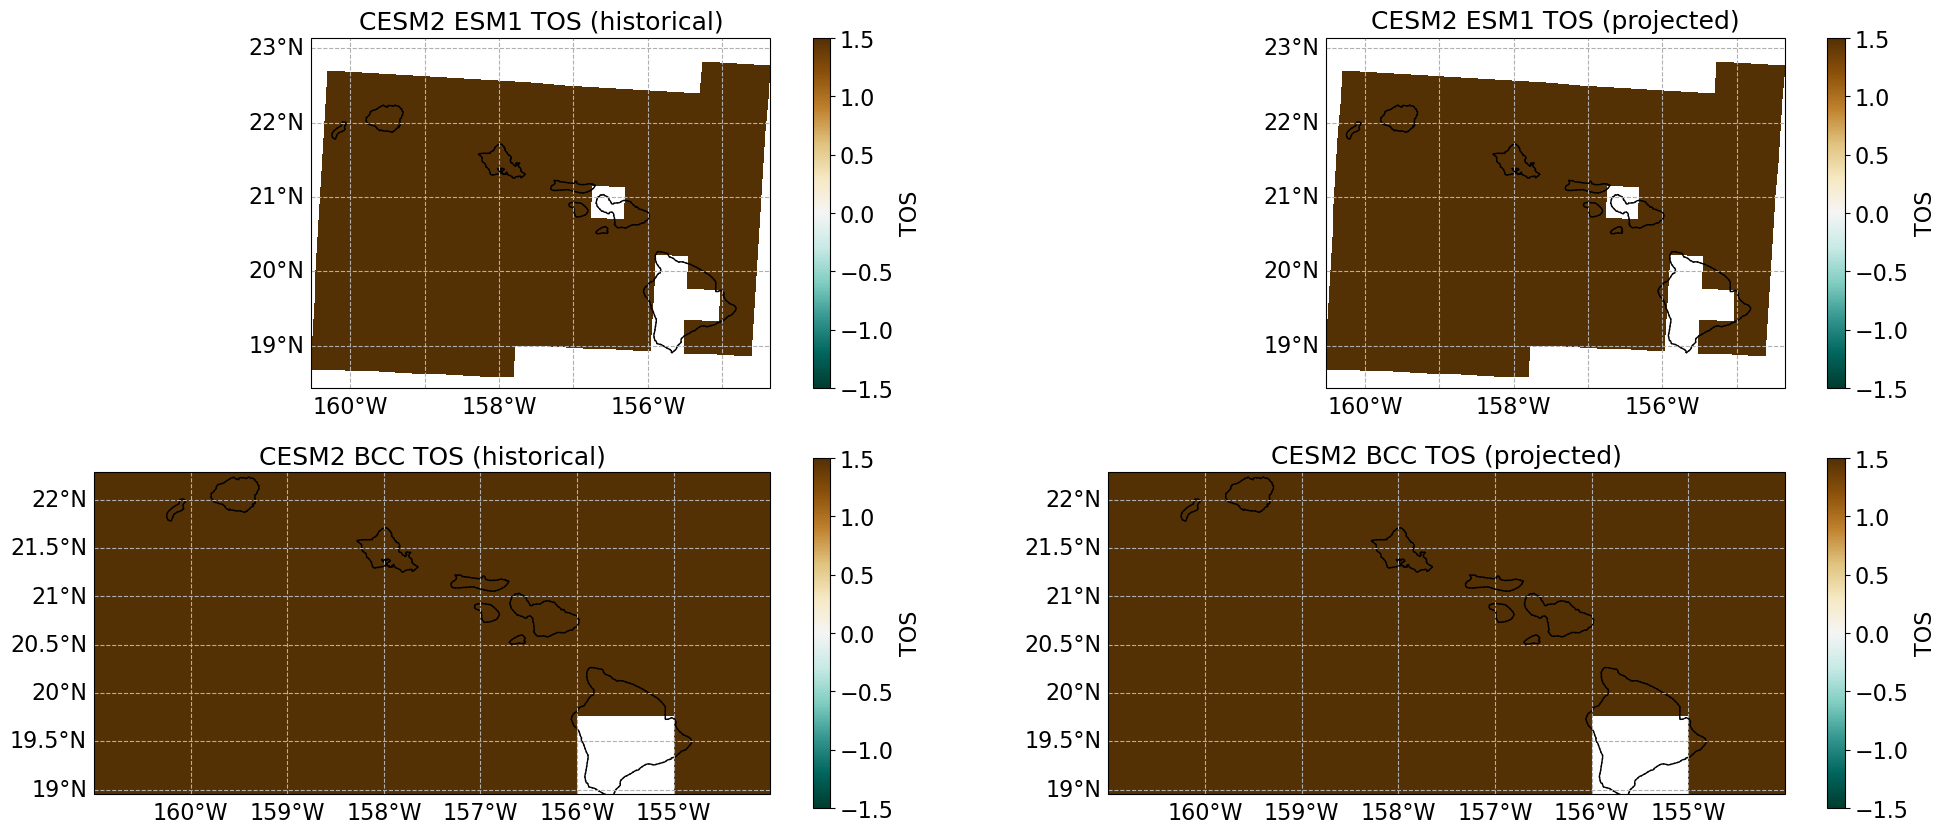

In [24]:
# historical and projected trends of the two models
map = ccrs.PlateCarree()

# Make a figure with four subplots
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(24, 10), subplot_kw={"projection": map})

# Subplot 1: ESM1 historical
plot1 = axes[0,0].pcolormesh(esm1_hist_mm_mean.longitude,
                           esm1_hist_mm_mean.latitude,
                           esm1_hist_mm_mean.tos,
                           transform=map, cmap="BrBG_r", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[0,0].add_feature(cfeature.COASTLINE)
axes[0,0].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[0,0].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot1, ax=axes[0,0], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[0,0].set_title("CESM2 ESM1 TOS (historical)", fontsize=18)

# Subplot 2: ESM1 projected
plot2 = axes[0,1].pcolormesh(esm1_proj_mm_mean.longitude,
                           esm1_proj_mm_mean.latitude,
                           esm1_proj_mm_mean.tos,
                           transform=map, cmap="BrBG_r", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[0,1].add_feature(cfeature.COASTLINE)
axes[0,1].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[0,1].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot2, ax=axes[0,1], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[0,1].set_title("CESM2 ESM1 TOS (projected)", fontsize=18)

# Subplot 3: BCC Historical
plot3 = axes[1,0].pcolormesh(BCC_hist_mm_mean.longitude,
                           BCC_hist_mm_mean.latitude,
                           BCC_hist_mm_mean.tos,
                           transform=map, cmap="BrBG_r", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[1,0].add_feature(cfeature.COASTLINE)
axes[1,0].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[1,0].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot3, ax=axes[1,0], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[1,0].set_title("CESM2 BCC TOS (historical)", fontsize=18)

# Subplot 2: BCC
plot4 = axes[1,1].pcolormesh(BCC_proj_mm_mean.longitude,
                           BCC_proj_mm_mean.latitude,
                           BCC_proj_mm_mean.tos,
                           transform=map, cmap="BrBG_r", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[1,1].add_feature(cfeature.COASTLINE)
axes[1,1].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[1,1].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot4, ax=axes[1,1], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[1,1].set_title("CESM2 BCC TOS (projected)", fontsize=18)

In [25]:
# Calculate the differences
esm1_diff_mm = esm1_proj_mm.mean(dim="time") - esm1_hist_mm.mean(dim="time")
BCC_diff_mm = BCC_proj_mm.mean(dim="time") - BCC_hist_mm.mean(dim="time")

In [26]:
# Calculate the ensemble means
esm1_diff_mm_mean = esm1_diff_mm.mean(dim="member")
BCC_diff_mm_mean = BCC_diff_mm.mean(dim="member")

Text(0.5, 1.0, 'CESM2 BCC TOS (late-century - historical)')

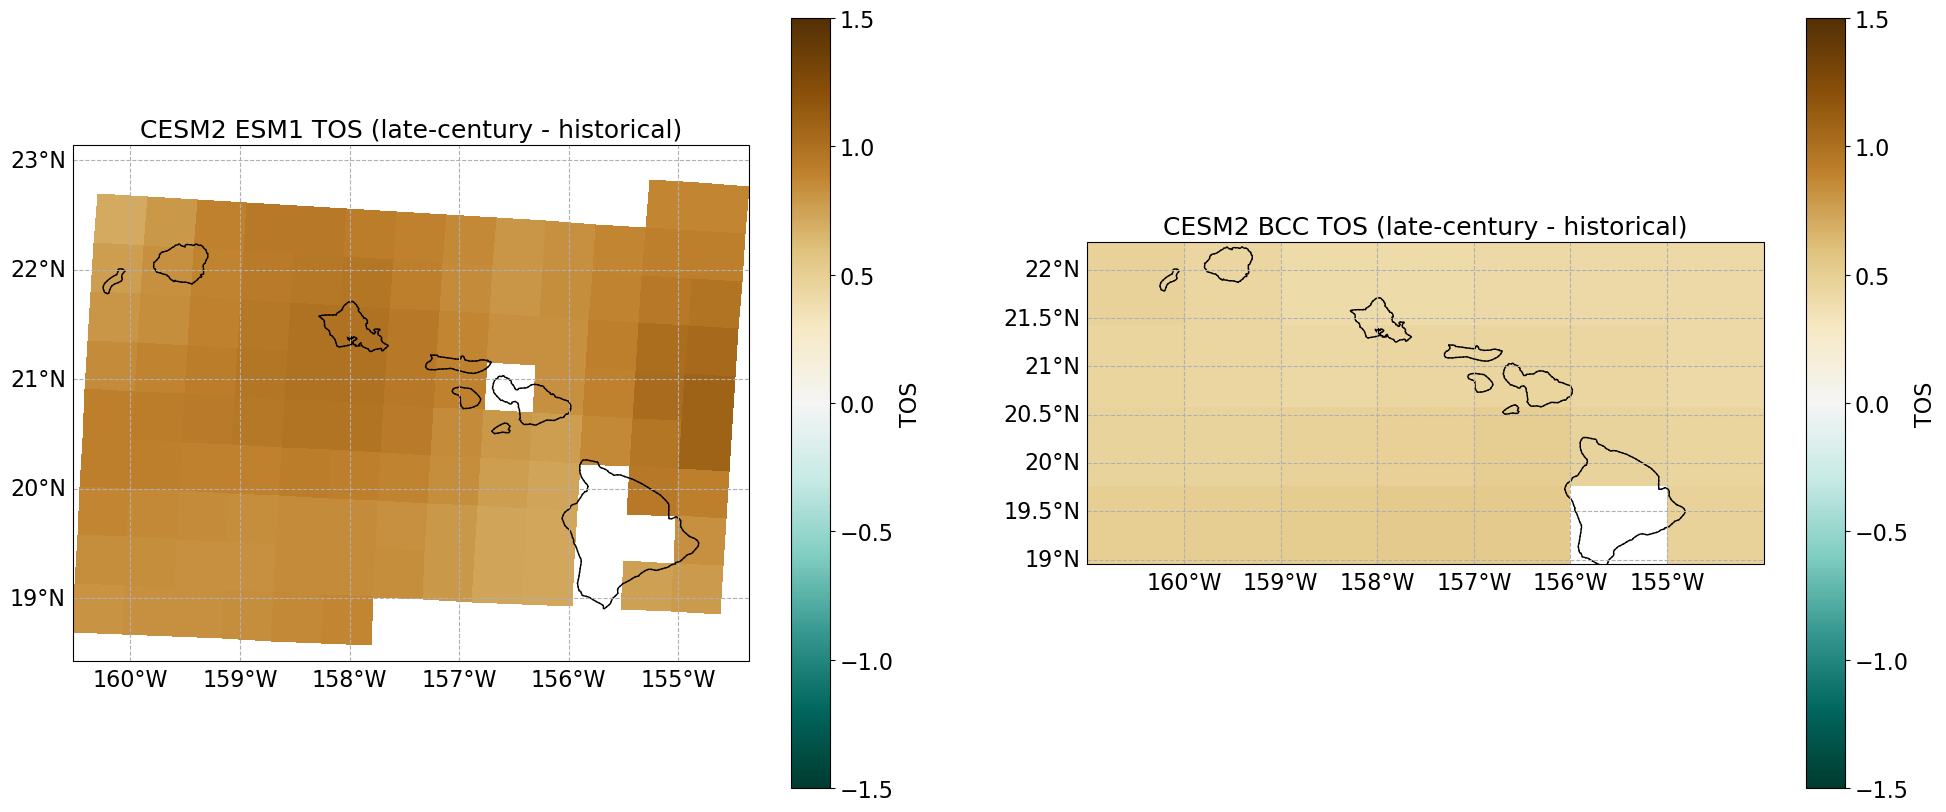

In [27]:
map = ccrs.PlateCarree()

# Make a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(24, 10), subplot_kw={"projection": map})

# Subplot 1: ESM1
plot1 = axes[0].pcolormesh(esm1_diff_mm_mean.longitude,
                           esm1_diff_mm_mean.latitude,
                           esm1_diff_mm_mean.tos,
                           transform=map, cmap="BrBG_r", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[0].add_feature(cfeature.COASTLINE)
axes[0].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[0].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot1, ax=axes[0], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[0].set_title("CESM2 ESM1 TOS (late-century - historical)", fontsize=18)

# Subplot 2: BCC
plot2 = axes[1].pcolormesh(BCC_diff_mm_mean.longitude,
                           BCC_diff_mm_mean.latitude,
                           BCC_diff_mm_mean.tos,
                           transform=map, cmap="BrBG_r", vmin=-1.5, vmax=1.5)

# Add coastlines, state borders, and gridlines
axes[1].add_feature(cfeature.COASTLINE)
axes[1].add_feature(cfeature.STATES, linestyle=":")
gl1 = axes[1].gridlines(draw_labels=True, linestyle="--")
gl1.top_labels = False
gl1.right_labels = False
gl1.xlabel_style = {'size': 16}
gl1.ylabel_style = {'size': 16}

# Add colorbar
cbar1 = plt.colorbar(plot2, ax=axes[1], orientation='vertical', pad=0.05)
cbar1.set_label("TOS", fontsize=16)
cbar1.ax.tick_params(labelsize=16)

axes[1].set_title("CESM2 BCC TOS (late-century - historical)", fontsize=18)

### Conlusions